#### K-Means Clustering

- . It is an unsupervised machine learning algorithm

- . K-means divides the data into non overlapping subsets(clusters) without any clustering internal structure.

- . Partitioning clustering

- . K-means performs division of objects into clusters which are "similar" between them and are "dissimilar" to the object 
belonging to another cluster.

                                    Clustering

           Heirachical Clustering                                             Partitional Clustering

    Agglomerative                 Divisive                                 K-means                 Fuzzy c-means

#### Application of  K-means Clustering

- . Academic Performance
- . Diagnostic System
- . Search Engines
- . Wireless Sensor Method

### How it works

                                       Start

                                       Elbow point(k)

                                       Measure the distance

                                       Grouping based on minimum distance

               if clusters are unstable   -  Reposition the centroids  - if clusters are stable - converge

              repeat the process from measuring the distance

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()   #for plot styling
import numpy as np

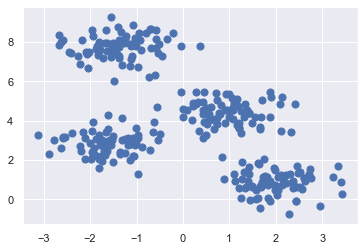

In [3]:
#creating clusters of dataset
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [5]:
y_kmeans

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0], d

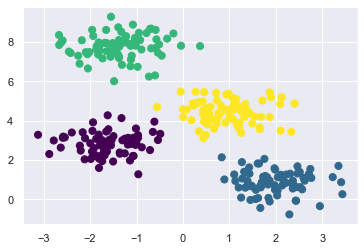

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly chose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a Assign labels based on closest centre
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Findnew centres form means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        return centers, labels
    
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        
        

In [8]:
import pandas as pd

data = pd.read_csv("//Users//motolanikay-salami//Downloads//zoo.csv")

In [9]:
# check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


<AxesSubplot:>

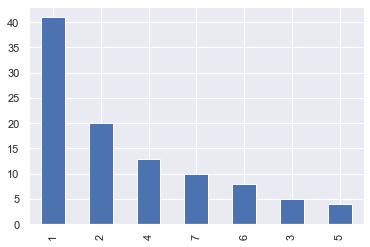

In [10]:
# identify unique labels and plot them
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [11]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
# extract features necessary for clustering within a single variable
features = data.values[:,1:-1]
features.shape

(101, 16)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7,linkage="average",affinity="cosine")

In [14]:
# predict labels for each animal
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [15]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [16]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [17]:
labels = labels-1

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
# print the RMSE of the model
score = mean_squared_error(labels,model.labels_)

In [20]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
